<a href="https://colab.research.google.com/github/Jeevesh8/Competitive-Coding-Library/blob/master/SolarRadianceBoostingWithLSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import glob

path = r'/content/drive/My Drive/SolarData'
all_files=[]
i=1998
for i in range(21) :
  all_files.append('/content/drive/My Drive/SolarData/106953_36.33_-110.74_'+str(1998+i)+'.csv')
li=[]
cols = ['Year','Month','Day','Hour','Minute','DHI','DNI','GHI','Clearsky DHI','CLearsky DNI','Clearsky GHI','Cloud Type','Dew Point','Solar Zenith Angle']
for filename in all_files :
  df = pd.read_csv(filename, skiprows=[0,1])
  li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
df

['/content/drive/My Drive/SolarData/106953_36.33_-110.74_1998.csv', '/content/drive/My Drive/SolarData/106953_36.33_-110.74_1999.csv', '/content/drive/My Drive/SolarData/106953_36.33_-110.74_2000.csv', '/content/drive/My Drive/SolarData/106953_36.33_-110.74_2001.csv', '/content/drive/My Drive/SolarData/106953_36.33_-110.74_2002.csv', '/content/drive/My Drive/SolarData/106953_36.33_-110.74_2003.csv', '/content/drive/My Drive/SolarData/106953_36.33_-110.74_2004.csv', '/content/drive/My Drive/SolarData/106953_36.33_-110.74_2005.csv', '/content/drive/My Drive/SolarData/106953_36.33_-110.74_2006.csv', '/content/drive/My Drive/SolarData/106953_36.33_-110.74_2007.csv', '/content/drive/My Drive/SolarData/106953_36.33_-110.74_2008.csv', '/content/drive/My Drive/SolarData/106953_36.33_-110.74_2009.csv', '/content/drive/My Drive/SolarData/106953_36.33_-110.74_2010.csv', '/content/drive/My Drive/SolarData/106953_36.33_-110.74_2011.csv', '/content/drive/My Drive/SolarData/106953_36.33_-110.74_2012.

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
0,1998,1,1,0,0,0,0,0,0,0,0,7,-5.0,165.50,0,0.146,1.3,0.829,194.6,64.69,0.0,810.0
1,1998,1,1,0,30,0,0,0,0,0,0,7,-5.0,166.65,0,0.146,1.3,0.835,194.6,64.67,0.0,800.0
2,1998,1,1,1,0,0,0,0,0,0,0,8,-5.0,164.82,0,0.146,1.3,0.841,194.5,64.45,0.0,800.0
3,1998,1,1,1,30,0,0,0,0,0,0,7,-5.0,160.86,0,0.146,1.3,0.854,194.5,64.44,0.0,800.0
4,1998,1,1,2,0,0,0,0,0,0,0,7,-5.0,155.80,0,0.146,1.3,0.867,192.2,64.38,0.0,800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367915,2018,12,31,21,30,0,0,0,0,0,0,0,-9.1,139.84,0,0.140,1.3,0.400,92.0,44.81,1.6,812.0
367916,2018,12,31,22,0,0,0,0,0,0,0,0,-8.7,145.79,0,0.140,1.3,0.400,97.0,46.74,1.5,813.0
367917,2018,12,31,22,30,0,0,0,0,0,0,0,-8.7,151.59,0,0.140,1.2,0.400,105.0,47.08,1.4,813.0
367918,2018,12,31,23,0,0,0,0,0,0,0,0,-8.4,157.08,0,0.140,1.1,0.400,112.0,47.96,1.4,813.0


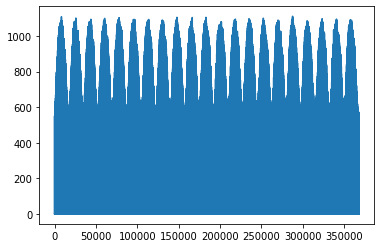

In [0]:
import matplotlib.pyplot as plt
plt.plot(df['GHI'].tolist())
plt.show()

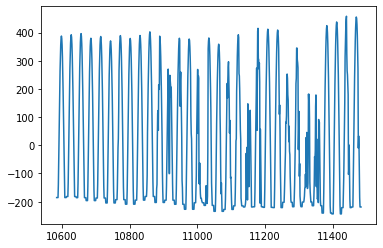

In [130]:
plt.plot(morning_dat.loc[(morning_dat['Month']==1)&(morning_dat['Year']==1999),'day_residual'])
plt.show()

In [0]:
from statsmodels.tsa.stattools import kpss
time_series_col=df.loc[(df['Hour']==12)&(df['Month']<=7)&(df['Month']>=4),'GHI']
kpss_out = kpss(time_series_col, regression='c',lags='auto')
print(kpss_out[0:3])
if kpss_out[0]>kpss_out[3]['10%'] : 
  print('Covariance Stationary !!!')
else :
  kpss_out = kpss(time_series_col, regression='ct',lags='legacy')
  print(kpss_out[0:3])
  if kpss_out[0]>kpss_out[3]['10%'] : 
    print('Covariance Stationary around trend!!!')
  else :
    print('NO.No. Sorry')

(0.1400162913413425, 0.1, 29)
(0.05601148183752607, 0.1, 33)
NO.No. Sorry


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [0]:
#df['season'](MAYBE)

In [0]:
#Learning to identify night(MAYBE)
'''for index in range(len(df)) :
  if df.loc[index,'GHI']==0 :
    df.at[index,'Night'] = True
  else :
    df.at[index,'Night'] = False'''

In [0]:
from math import *
def date_to_nth_day(year, month, day):
    date = pd.Timestamp(year=year,month=month,day=day)
    new_year_day = pd.Timestamp(year=year, month=1, day=1)
    return (date - new_year_day).days + 1

def time_encode(df) :
  final_lis=[]
  A = 180
  B = 48
  C = 15
  for index,row in df.iterrows() :
    lis = []
    d = date_to_nth_day(df.loc[index,'Year'],df.loc[index,'Month'],df.loc[index,'Day'])
    lis += [A*sin(d*pi/365),A*sin(2*d*pi/365),A*sin(3*d*pi/365),A*sin(4*d*pi/365)]
    [h,minu,sec] = [df.loc[index,'Hour'],df.loc[index,'Minute'],00]
    h = float(h)
    minu = float(minu) 
    lis += [B*sin(h*pi/24),B*sin(2*h*pi/24)]
    lis += [C*sin(minu*pi/60),B*sin(2*minu*pi/60)]
    final_lis.append(lis) 
  d1=pd.DataFrame(final_lis,columns=['DAY_ENC1','DAY_ENC2','DAY_ENC3','DAY_ENC4','TIME_ENC1','TIME_ENC2','TIME_ENC3','TIME_ENC4'])
  df.reset_index(drop=True,inplace=True)
  d1.reset_index(drop=True,inplace=True)
  df=pd.concat([df,d1],axis=1,sort=False)
  #df=df.drop(axis=1,columns=['Time'])    Uncomment Finally!!!
  return df
df = time_encode(df)
df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,DAY_ENC1,DAY_ENC2,DAY_ENC3,DAY_ENC4,TIME_ENC1,TIME_ENC2,TIME_ENC3,TIME_ENC4
0,1998,1,1,0,0,0,0,0,0,0,0,7,-5.0,165.50,0,0.146,1.3,0.829,194.6,64.69,0.0,810.0,1.549259e+00,3.098404e+00,4.647319e+00,6.195890e+00,0.000000,0.000000,0.0,0.000000e+00
1,1998,1,1,0,30,0,0,0,0,0,0,7,-5.0,166.65,0,0.146,1.3,0.835,194.6,64.67,0.0,800.0,1.549259e+00,3.098404e+00,4.647319e+00,6.195890e+00,0.000000,0.000000,15.0,2.719459e-14
2,1998,1,1,1,0,0,0,0,0,0,0,8,-5.0,164.82,0,0.146,1.3,0.841,194.5,64.45,0.0,800.0,1.549259e+00,3.098404e+00,4.647319e+00,6.195890e+00,6.265257,12.423314,0.0,0.000000e+00
3,1998,1,1,1,30,0,0,0,0,0,0,7,-5.0,160.86,0,0.146,1.3,0.854,194.5,64.44,0.0,800.0,1.549259e+00,3.098404e+00,4.647319e+00,6.195890e+00,6.265257,12.423314,15.0,2.719459e-14
4,1998,1,1,2,0,0,0,0,0,0,0,7,-5.0,155.80,0,0.146,1.3,0.867,192.2,64.38,0.0,800.0,1.549259e+00,3.098404e+00,4.647319e+00,6.195890e+00,12.423314,24.000000,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367915,2018,12,31,21,30,0,0,0,0,0,0,0,-9.1,139.84,0,0.140,1.3,0.400,92.0,44.81,1.6,812.0,-5.789242e-14,1.157848e-13,6.613093e-14,2.315697e-13,18.368805,-33.941125,15.0,2.719459e-14
367916,2018,12,31,22,0,0,0,0,0,0,0,0,-8.7,145.79,0,0.140,1.3,0.400,97.0,46.74,1.5,813.0,-5.789242e-14,1.157848e-13,6.613093e-14,2.315697e-13,12.423314,-24.000000,0.0,0.000000e+00
367917,2018,12,31,22,30,0,0,0,0,0,0,0,-8.7,151.59,0,0.140,1.2,0.400,105.0,47.08,1.4,813.0,-5.789242e-14,1.157848e-13,6.613093e-14,2.315697e-13,12.423314,-24.000000,15.0,2.719459e-14
367918,2018,12,31,23,0,0,0,0,0,0,0,0,-8.4,157.08,0,0.140,1.1,0.400,112.0,47.96,1.4,813.0,-5.789242e-14,1.157848e-13,6.613093e-14,2.315697e-13,6.265257,-12.423314,0.0,0.000000e+00


In [0]:
'Cloud Type','GHI','Temperature','Wind Speed','Relative Humidity','DAY_ENC1','DAY_ENC2','DAY_ENC3','DAY_ENC4','TIME_ENC1','TIME_ENC2','TIME_ENC3','TIME_ENC4'

In [0]:
#Learning to predict only using time
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error
data = df[['Year','Month','Day','Hour','Minute','GHI']]
#data = time_df.loc[time_df['Year']!='2017' and time_df['Year']!='2018']
label = data[['GHI','Year']]
data = data.drop(['GHI'],axis=1)
data = data[data['Year']!=2018]
#print(data)
label = label[label['Year']!=2018]
print("Here")
train_data = data[data['Year']!=2016]
#print(train_data)
train_data = train_data[train_data['Year']!=2017]

test_data = data[data['Year']==2016]
#print(test_data)
test_data = test_data.append(data.loc[data['Year']==2017])
#print(test_data)
#test_data1 = test_data[0:100]

train_label = label[label['Year']!=2016]
train_label = train_label[train_label['Year']!=2017]
train_label = train_label.drop(['Year'],axis=1)

test_label = label[label['Year']==2016]
test_label = test_label.append(label.loc[label['Year']==2017])
test_label = test_label.drop(['Year'],axis=1)
#test_label1 = test_label[0:100]
#print(test_label1)
dtrain = xgb.DMatrix(train_data, label=train_label)
dtest = xgb.DMatrix(test_data,label=test_label)
#evallist = [(dtest,'eval'),(dtrain,'train')]
#param = {'eta':0.1, 'eval_metric' : 'auc', 'max_depth' : 2}
#num_round = 5
xg_reg = xgb.XGBRegressor(max_depth=5,n_estimators=60,reg_lambda=0.1)
xg_reg.fit(np.array(train_data.values),np.array(train_label.values))
#print(np.array(test_data.values))
preds = xg_reg.predict(np.array(test_data.values))
#print(preds)
rmse = np.sqrt(mean_squared_error(np.array(test_label.values), preds))
print(rmse)

Here
[09:57:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
98.34135203308715


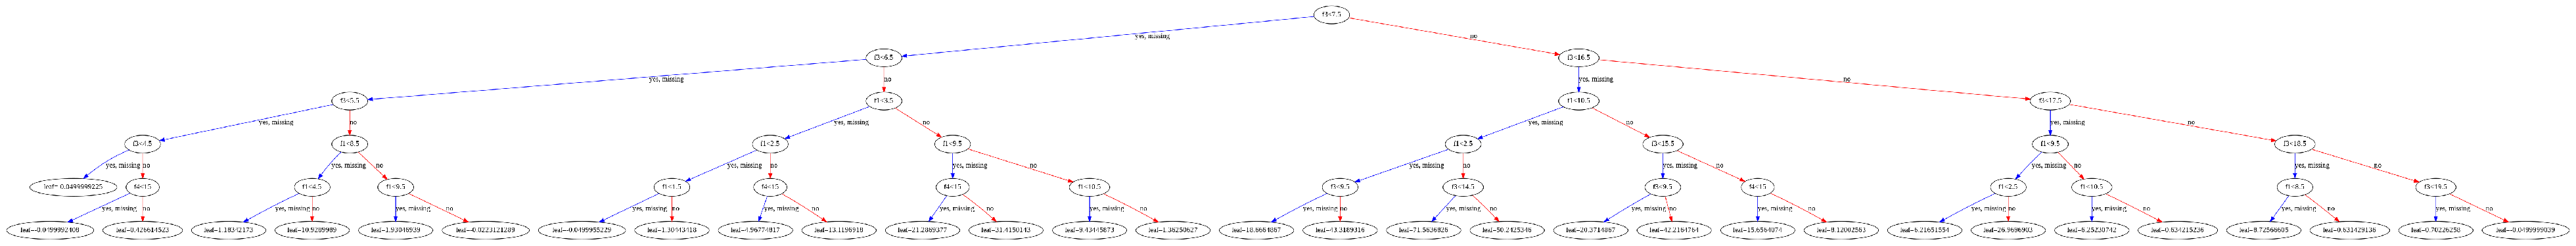

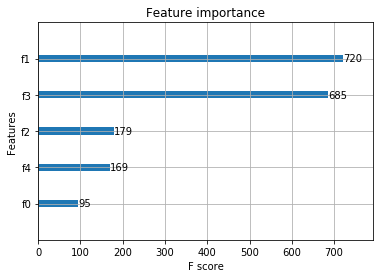

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(70, 70))
xgb.plot_tree(xg_reg,ax=ax)
#plt.rcParams['figure.figsize'] = [50, 10]
xgb.plot_importance(xg_reg)
#plt.rcParams['figure.figsize'] = [5, 5]
plt.show()


In [0]:
dat = df[df['Year']!=2018].copy()
month = [i+1 for i in range(12)]
day = [i+1 for i in range(31)]
hour = [i for i in range(24)]
minute = [0,30]
for m in month :
  for d in day :
    for h in hour :
      for mi in minute :
        avg = dat.loc[(dat['Month']==m)&(dat['Hour']==h)&(dat['Day']==d)&(dat['Minute']==mi),'GHI'].mean(axis=0)
        dat.loc[(dat['Month']==m)&(dat['Hour']==h)&(dat['Day']==d)&(df['Minute']==mi),'Yearly'] = avg 

In [75]:
dat = dat.drop(columns=['Yearly'])
dat

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,DAY_ENC1,DAY_ENC2,DAY_ENC3,DAY_ENC4,TIME_ENC1,TIME_ENC2,TIME_ENC3,TIME_ENC4,nthDay
0,1998,1,1,0,0,0,0,0,0,0,0,7,-5.0,165.50,0,0.146,1.3,0.829,194.6,64.69,0.0,810.0,1.549259e+00,3.098404e+00,4.647319e+00,6.195890e+00,0.000000,0.000000,0.0,0.000000e+00,1.0
1,1998,1,1,0,30,0,0,0,0,0,0,7,-5.0,166.65,0,0.146,1.3,0.835,194.6,64.67,0.0,800.0,1.549259e+00,3.098404e+00,4.647319e+00,6.195890e+00,0.000000,0.000000,15.0,2.719459e-14,1.0
2,1998,1,1,1,0,0,0,0,0,0,0,8,-5.0,164.82,0,0.146,1.3,0.841,194.5,64.45,0.0,800.0,1.549259e+00,3.098404e+00,4.647319e+00,6.195890e+00,6.265257,12.423314,0.0,0.000000e+00,1.0
3,1998,1,1,1,30,0,0,0,0,0,0,7,-5.0,160.86,0,0.146,1.3,0.854,194.5,64.44,0.0,800.0,1.549259e+00,3.098404e+00,4.647319e+00,6.195890e+00,6.265257,12.423314,15.0,2.719459e-14,1.0
4,1998,1,1,2,0,0,0,0,0,0,0,7,-5.0,155.80,0,0.146,1.3,0.867,192.2,64.38,0.0,800.0,1.549259e+00,3.098404e+00,4.647319e+00,6.195890e+00,12.423314,24.000000,0.0,0.000000e+00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350395,2017,12,31,21,30,0,0,0,0,0,0,1,-1.0,139.79,0,0.137,1.0,0.786,169.5,91.56,-1.0,790.0,-5.789242e-14,1.157848e-13,6.613093e-14,2.315697e-13,18.368805,-33.941125,15.0,2.719459e-14,NaN
350396,2017,12,31,22,0,0,0,0,0,0,0,4,-1.0,145.74,0,0.137,1.1,0.794,183.3,98.07,-2.0,790.0,-5.789242e-14,1.157848e-13,6.613093e-14,2.315697e-13,12.423314,-24.000000,0.0,0.000000e+00,NaN
350397,2017,12,31,22,30,0,0,0,0,0,0,4,-1.0,151.54,0,0.137,1.1,0.807,183.3,98.07,-2.0,790.0,-5.789242e-14,1.157848e-13,6.613093e-14,2.315697e-13,12.423314,-24.000000,15.0,2.719459e-14,NaN
350398,2017,12,31,23,0,0,0,0,0,0,0,0,-1.0,157.03,0,0.137,1.1,0.821,196.0,98.17,-2.0,790.0,-5.789242e-14,1.157848e-13,6.613093e-14,2.315697e-13,6.265257,-12.423314,0.0,0.000000e+00,NaN


In [110]:
'''
if dat.loc[(dat['Hour']==20)&(dat['Minute']==0),'GHI'].eq(0).all() and dat.loc[(dat['Hour']==5)&(dat['Minute']==0),'GHI'].eq(0).all() :
  print('Correct Night Duration')
else :
  print('Try Again')

morning_dat = dat.loc[(dat['Hour']<20)&(dat['Hour']>5)|((dat['Hour']==5)&(dat['Minute']==30))].copy()
morning_dat = morning_dat.reset_index(drop=True)
for index in range(len(morning_dat)) :
  morning_dat.loc[index,'nthDay'] = date_to_nth_day(morning_dat.loc[index,'Year'],morning_dat.loc[index,'Month'],morning_dat.loc[index,'Day'])
'''
years=[i+1998 for i in range(19)]
print('Here')
#yearly_avg = [morning_dat.loc[morning_dat['Year']==1998+i,'GHI'].mean(axis=0) for i in range(19)]
#morning_dat.drop(morning_dat.tail(1).index,inplace=True)
yearly_avg = morning_dat['GHI'].mean(axis=0)
print(yearly_avg)
morning_dat.loc['year_residual'] = pd.Series(morning_dat['GHI']-yearly_avg)
morning_dat.drop(morning_dat.tail(1).index,inplace=True) 
print(morning_dat)
monthly_residual_avg = [morning_dat.loc[morning_dat['Month']==i+1,'year_residual'].mean(axis=0) for i in range(12)]
for index in range(len(morning_dat)) :
  morning_dat.loc[index,'month_residual'] = morning_dat.loc[index,'year_residual'] - monthly_residual_avg[int(morning_dat.loc[index,'Month'].item())-1]

print(morning_dat)
daily_residual_avg = [morning_dat.loc[morning_dat['nthDay']==i+1,'month_residual'].mean(axis=0) for i in range(366)]
print('Here')
for index in range(len(morning_dat)) :
  morning_dat.loc[index,'day_residual'] = morning_dat.loc[index,'month_residual'] - daily_residual_avg[int(morning_dat.loc[index,'nthDay'].item())-1]


Here
382.29307982994806
          Year  Month   Day  ...  year_residual  month_residual  day_residual
0       1998.0    1.0   1.0  ...     -382.29308     -209.164071   -185.444828
1       1998.0    1.0   1.0  ...     -382.29308     -209.164071   -185.444828
2       1998.0    1.0   1.0  ...     -382.29308     -209.164071   -185.444828
3       1998.0    1.0   1.0  ...     -382.29308     -209.164071   -185.444828
4       1998.0    1.0   1.0  ...     -382.29308     -209.164071   -185.444828
...        ...    ...   ...  ...            ...             ...           ...
211695  2017.0   12.0  31.0  ...     -382.29308     -188.122191           NaN
211696  2017.0   12.0  31.0  ...     -382.29308     -188.122191           NaN
211697  2017.0   12.0  31.0  ...     -382.29308     -188.122191           NaN
211698  2017.0   12.0  31.0  ...     -382.29308     -188.122191           NaN
211699  2017.0   12.0  31.0  ...     -382.29308     -188.122191           NaN

[211700 rows x 34 columns]
          Ye

In [0]:
times = [[5,30]]
i=6
time_avgs = [[None]*29]*366
while(i<20) :
  times.append([i,0])
  times.append([i,30])
  i+=1
print(len(times))
for x in range(len(times)) :
  for i in range(366) :
    time_avgs[i][x] = morning_dat.loc[(morning_dat['nthDay']==i+1)&(morning_dat['Hour']==times[x][0])&(morning_dat['Minute']==times[x][1]),'day_residual'].mean()
  print('Here')


In [138]:
def c_to_i(a,b) :
  #print(a,b)
  if a==5 and b==30 : return 0
  if b==30 : return 2*(a-6)+2
  else : return 2*(a-6)+1  

for index in range(len(morning_dat)) :
  morning_dat.loc[index, 'ResidueFORlstm'] = time_avgs[ int(morning_dat.loc[index, 'nthDay'])-1 ][ int(c_to_i(morning_dat.loc[index,'Hour'],morning_dat.loc[index,'Minute'])) ] - morning_dat.loc[index,'day_residual']
morning_dat

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,DAY_ENC1,DAY_ENC2,DAY_ENC3,DAY_ENC4,TIME_ENC1,TIME_ENC2,TIME_ENC3,TIME_ENC4,nthDay,year_residual,month_residual,day_residual,ResidueFORlstm
0,1998.0,1.0,1.0,5.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,-5.0,114.35,0.0,0.146,1.2,0.984,177.6,64.89,-1.0,800.0,1.549259e+00,3.098404e+00,4.647319e+00,6.195890e+00,29.220549,46.36444,15.0,2.719459e-14,1.0,-382.29308,-209.164071,-185.444828,-14.272414
1,1998.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,-5.0,108.48,0.0,0.146,1.2,0.996,173.5,70.32,-1.0,800.0,1.549259e+00,3.098404e+00,4.647319e+00,6.195890e+00,33.941125,48.00000,0.0,0.000000e+00,1.0,-382.29308,-209.164071,-185.444828,-14.272414
2,1998.0,1.0,1.0,6.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,-5.0,102.71,1.0,0.146,1.2,1.004,173.5,70.32,-1.0,800.0,1.549259e+00,3.098404e+00,4.647319e+00,6.195890e+00,33.941125,48.00000,15.0,2.719459e-14,1.0,-382.29308,-209.164071,-185.444828,-14.272414
3,1998.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,-5.0,97.09,0.0,0.146,1.3,1.012,171.7,71.06,-1.0,800.0,1.549259e+00,3.098404e+00,4.647319e+00,6.195890e+00,38.080960,46.36444,0.0,0.000000e+00,1.0,-382.29308,-209.164071,-185.444828,-14.272414
4,1998.0,1.0,1.0,7.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,-5.0,91.64,0.0,0.146,1.3,1.014,171.7,66.08,0.0,800.0,1.549259e+00,3.098404e+00,4.647319e+00,6.195890e+00,38.080960,46.36444,15.0,2.719459e-14,1.0,-382.29308,-209.164071,-185.444828,-14.272414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211695,2017.0,12.0,31.0,17.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.91,0.0,0.137,0.6,0.780,20.1,93.80,0.0,790.0,-5.789242e-14,1.157848e-13,6.613093e-14,2.315697e-13,38.080960,-46.36444,15.0,2.719459e-14,365.0,-382.29308,-188.122191,-189.777586,-9.939655
211696,2017.0,12.0,31.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,98.40,0.0,0.137,0.6,0.767,69.7,92.96,0.0,790.0,-5.789242e-14,1.157848e-13,6.613093e-14,2.315697e-13,33.941125,-48.00000,0.0,0.000000e+00,365.0,-382.29308,-188.122191,-189.777586,-9.939655
211697,2017.0,12.0,31.0,18.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,104.06,0.0,0.137,0.6,0.764,69.7,92.96,0.0,790.0,-5.789242e-14,1.157848e-13,6.613093e-14,2.315697e-13,33.941125,-48.00000,15.0,2.719459e-14,365.0,-382.29308,-188.122191,-189.777586,-9.939655
211698,2017.0,12.0,31.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,-1.0,109.85,0.0,0.137,0.6,0.761,115.3,92.35,0.0,790.0,-5.789242e-14,1.157848e-13,6.613093e-14,2.315697e-13,29.220549,-46.36444,0.0,0.000000e+00,365.0,-382.29308,-188.122191,-189.777586,-9.939655


In [0]:
#Predicting Residuals Using LSTMs
